### Database initialisation verification

In [1]:
from sqlalchemy import inspect, create_engine, text

# Connexion à la base
# engine = create_engine("sqlite:///./census.db")
engine = create_engine("sqlite:///./dump/generated-user.db")
inspector = inspect(engine)

# Liste des tables
tables = inspector.get_table_names()
print("✅ Tables disponibles :", tables)

# Si la table "users" existe
if "users" in tables:
    # Colonnes
    columns = [col["name"] for col in inspector.get_columns("users")]
    print("🧱 Colonnes de 'users' :", columns)

    # Affichage des 5 premières lignes
    with engine.connect() as conn:
        result = conn.execute(text("SELECT * FROM users LIMIT 5"))
        rows = result.mappings().all()  # ✅ renvoie des dict-like
        print("\n📊 Extrait des données (5 premières lignes) :")
        for row in rows:
            print(dict(row))
else:
    print("❌ La table 'users' n'existe pas.")

✅ Tables disponibles : ['alembic_version', 'users']
🧱 Colonnes de 'users' : ['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

📊 Extrait des données (5 premières lignes) :
{'id': 1, 'age': 39, 'workclass': 'State-gov', 'fnlwgt': 77516, 'education': 'Bachelors', 'education_num': 13, 'marital_status': 'Never-married', 'occupation': 'Adm-clerical', 'relationship': 'Not-in-family', 'capital_gain': 2174, 'capital_loss': 0, 'hours_per_week': 40, 'native_country': 'United-States', 'income': '<=50K'}
{'id': 2, 'age': 50, 'workclass': 'Self-emp-not-inc', 'fnlwgt': 83311, 'education': 'Bachelors', 'education_num': 13, 'marital_status': 'Married-civ-spouse', 'occupation': 'Exec-managerial', 'relationship': 'Husband', 'capital_gain': 0, 'capital_loss': 0, 'hours_per_week': 13, 'native_country': 'United-States', 'income': '<=50K'}
{'id': 3, 'age': 38, 'workc

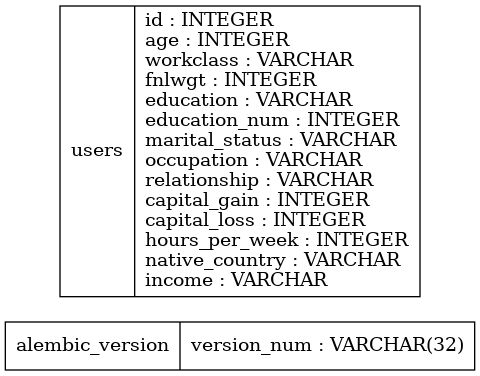

In [2]:
from sqlalchemy import create_engine, MetaData
from graphviz import Digraph
from IPython.display import Image, display
import os

# Connexion à la base
#engine = create_engine("sqlite:///./census.db")
engine = create_engine("sqlite:///./dump/generated-user.db")
metadata = MetaData()
metadata.reflect(bind=engine)

# Création du graphe
dot = Digraph(comment="ER Diagram", format='png')
dot.attr(rankdir='LR', fontsize='10')

# Créer un noeud pour chaque table
for table_name, table in metadata.tables.items():
    fields = [f"{col.name} : {col.type}" for col in table.columns]
    fields_str = "\\l".join(fields) + "\\l"
    label = f"{{{table_name}|{fields_str}}}"
    dot.node(table_name, shape="record", label=label)

# Rendu
output_path = "/tmp/census_schema"
dot.render(output_path, format="png", cleanup=True)

# Affichage dans le notebook
if os.path.exists(output_path + ".png"):
    display(Image(filename=output_path + ".png"))
else:
    print("❌ L'image n'a pas pu être générée.")

In [3]:
from sqlalchemy import create_engine
import os

db_path = os.path.abspath("dump/generated-user.db")
os.makedirs(os.path.dirname(db_path), exist_ok=True)

engine = create_engine(f"sqlite:///{db_path}")
with engine.connect() as conn:
    print("✅ Connexion réussie :", db_path)

    # Affichage des 5 premières lignes
    result = conn.execute(text("SELECT * FROM users LIMIT 5"))
    rows = result.mappings().all()  # ✅ renvoie des dict-like
    print("\n📊 Extrait des données (5 premières lignes) :")
    for row in rows:
        print(dict(row))

✅ Connexion réussie : /home/thomas/atlas/projects/scalable_model/dump/generated-user.db

📊 Extrait des données (5 premières lignes) :
{'id': 1, 'age': 39, 'workclass': 'State-gov', 'fnlwgt': 77516, 'education': 'Bachelors', 'education_num': 13, 'marital_status': 'Never-married', 'occupation': 'Adm-clerical', 'relationship': 'Not-in-family', 'capital_gain': 2174, 'capital_loss': 0, 'hours_per_week': 40, 'native_country': 'United-States', 'income': '<=50K'}
{'id': 2, 'age': 50, 'workclass': 'Self-emp-not-inc', 'fnlwgt': 83311, 'education': 'Bachelors', 'education_num': 13, 'marital_status': 'Married-civ-spouse', 'occupation': 'Exec-managerial', 'relationship': 'Husband', 'capital_gain': 0, 'capital_loss': 0, 'hours_per_week': 13, 'native_country': 'United-States', 'income': '<=50K'}
{'id': 3, 'age': 38, 'workclass': 'Private', 'fnlwgt': 215646, 'education': 'HS-grad', 'education_num': 9, 'marital_status': 'Divorced', 'occupation': 'Handlers-cleaners', 'relationship': 'Not-in-family', 'ca

In [4]:
import requests
import pandas as pd

def fetch_data_from_api():
    response = requests.get("http://localhost:8000/users/")
    response.raise_for_status()
    return pd.DataFrame(response.json())

df = fetch_data_from_api()
df.describe()


,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8141.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16281.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24421.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


In [6]:
df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of id                 int64
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object>

2025-07-16 10:57:40.606851: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/thomas/atlas/projects/scalable_model/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
=================Performance=after=training=================
MSE: 0.1024, MAE: 0.2056, R²: 0.4407


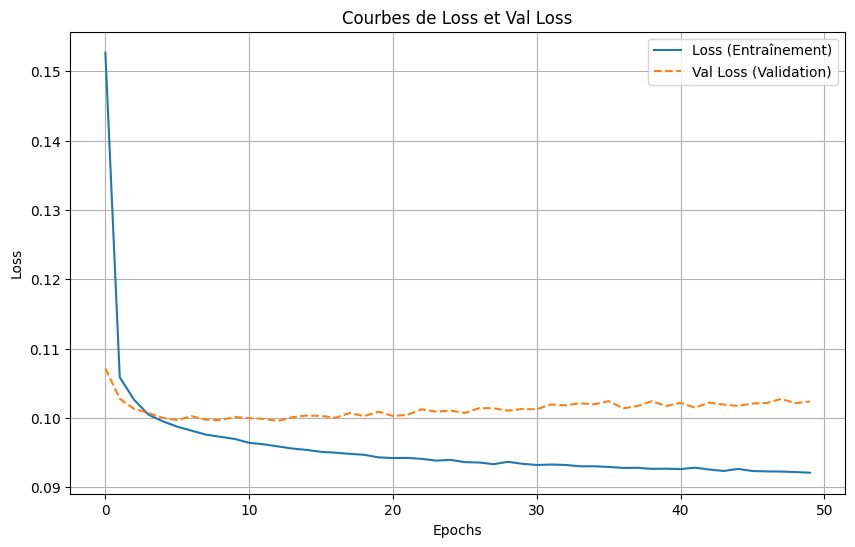

Model and preprocessor saved.


2025/07/16 10:58:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/16 10:58:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [1]:
from api.training.train import simple_model_train

numerical_cols = [
    "age",
    "fnlwgt",
    "education_num",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
]
categorical_cols = [
    "workclass",
    "education",
    "marital_status",
    "occupation",
    "relationship",
    "native_country",
]

predict_col = "income"

simple_model_train(numerical_cols, categorical_cols, predict_col)